<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/less_pore_types_pixel_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train with multiple images to predict 4 pore types:

In [2]:
## The training and test image paths
from skimage.io import imread, imshow
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import time
from google.colab.patches import cv2_imshow
import os


train_features_path =  "train_pixels_features_and_lables.csv"
test_features_path =  "test_pixels_features_and_lables.csv"



# Function to extract the pixel features

In [3]:
def extract_pixel_features(input_image):
  #load the image
  img_org = input_image  ## incase I train with multi images

  print('orginal image')
  print('img.shape',img_org.shape)
  cv2_imshow(img_org)

  # convert the image to gray scal
  img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
  print('gray image')
  print('gray image.shape',img.shape)
  cv2_imshow(img)

  # plt.imshow(img)
  # plt.axis('off')
  # plt.show()
  #Here, if we have multichannel image then extract the right channel instead of converting the image to grey.
  #For example, if DAPI contains nuclei information, extract the DAPI channel image first.
  #Multiple images can be used for training. For that, we need to concatenate the data
  #Save original image pixels into a data frame. This is our Feature #1.

  img2 = img.reshape(-1) ## reshape the image into single column
  print('img converted to one column',img2.shape)
  df = pd.DataFrame()
  t0 = time.time()   ## starting time

  df['Original Image'] = img2

  # #Generate Gabor features
  # num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
  # kernels = []
  # for theta in range(2):   #Define number of thetas
  #     theta = theta / 4. * np.pi
  #     for sigma in (1, 3):  #Sigma with 1 and 3
  #         for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
  #             for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


  #                 gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
  # #                print(gabor_label)
  #                 ksize=3  # we can use 9 if the image big size
  #                 kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
  #                 kernels.append(kernel)
  #                 #Now filter the image and add values to a new column
  #                 fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
  #                 filtered_img = fimg.reshape(-1)
  #                 df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
  #                 print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
  #                 num += 1  #Increment for gabor column label

  ########################################
  #Gerate OTHER FEATURES out of pixels and add them to the data frame

  #CANNY EDGE
  edges = cv2.Canny(img, 100,200)   #Image, min and max values
  edges1 = edges.reshape(-1)
  df['Canny Edge'] = edges1 #Add column to original dataframe

  from skimage.filters import roberts, sobel, scharr, prewitt

  #ROBERTS EDGE
  edge_roberts = roberts(img)
  edge_roberts1 = edge_roberts.reshape(-1)
  df['Roberts'] = edge_roberts1

  #SOBEL
  edge_sobel = sobel(img)
  edge_sobel1 = edge_sobel.reshape(-1)
  df['Sobel'] = edge_sobel1

  #SCHARR
  edge_scharr = scharr(img)
  edge_scharr1 = edge_scharr.reshape(-1)
  df['Scharr'] = edge_scharr1

  #PREWITT
  edge_prewitt = prewitt(img)
  edge_prewitt1 = edge_prewitt.reshape(-1)
  df['Prewitt'] = edge_prewitt1

  Kernal_size = 3

  #GAUSSIAN with sigma=3
  from scipy import ndimage as nd
  gaussian_img = nd.gaussian_filter(img, sigma=5)
  gaussian_img1 = gaussian_img.reshape(-1)
  df['Gaussian s3'] = gaussian_img1

  #GAUSSIAN with sigma=7
  gaussian_img2 = nd.gaussian_filter(img, sigma=7)
  gaussian_img3 = gaussian_img2.reshape(-1)
  df['Gaussian s7'] = gaussian_img3

  #MEDIAN with sigma=3
  median_img = nd.median_filter(img, size=Kernal_size)
  median_img1 = median_img.reshape(-1)
  df['Median s3'] = median_img1

  #VARIANCE with size=3
  variance_img = nd.generic_filter(img, np.var, size=Kernal_size)
  variance_img1 = variance_img.reshape(-1)
  df['Variance s3'] = variance_img1  #Add column to original dataframe

  feat_ext_time = time.time()-t0
  local_time_feature_rxtraction = time.localtime(feat_ext_time)

  # show some pf the feature images
  import matplotlib.pyplot as plt
  fig, axes = plt.subplots(1, 5, figsize=(10,10))
  print('input image',img.shape)
  print('gray image',img2.shape)

  axes[0].imshow(np.asanyarray(df['Original Image']).reshape(img.shape), cmap=plt.cm.gray)
  axes[1].imshow(np.asanyarray(df['Canny Edge']).reshape(img.shape), cmap=plt.cm.gray)
  axes[2].imshow(np.asanyarray(df['Roberts']).reshape(img.shape), cmap=plt.cm.gray)
  axes[3].imshow(np.asanyarray(df['Sobel']).reshape(img.shape), cmap=plt.cm.gray)
  axes[4].imshow(np.asanyarray(df['Scharr']).reshape(img.shape), cmap=plt.cm.gray)

  # show some pf the feature images
  fig, axes = plt.subplots(1, 5, figsize=(10,10))

  axes[0].imshow(np.asanyarray(df['Prewitt']).reshape(img.shape), cmap=plt.cm.gray)
  axes[1].imshow(np.asanyarray(df['Gaussian s3']).reshape(img.shape), cmap=plt.cm.gray)
  axes[2].imshow(np.asanyarray(df['Gaussian s7']).reshape(img.shape), cmap=plt.cm.gray)
  axes[3].imshow(np.asanyarray(df['Median s3']).reshape(img.shape), cmap=plt.cm.gray)
  axes[4].imshow(np.asanyarray(df['Variance s3']).reshape(img.shape), cmap=plt.cm.gray)

  # return img, img_org, df
  return img, df

# output (pore shapes) labels and create a mask

In [4]:
def label_image(img,img_org, output_labeled_image_path, features_csv, df):
  # Threshold the image to obtain binary image
  ## https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html

  ret, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)   ## check from here
  # Find contours in the binary image
  print('the binary image')
  print('binary shape', binary.shape)
  cv2_imshow(binary)

  contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # print("hierarchy", hierarchy)

  print('len main contours', len(contours))
  max_cnt = max(contours, key = cv2.contourArea)

  # ######################### new code
  max_area = cv2.contourArea(max_cnt)
  cnt_area_list = []
  convexity_all_pores=[]
  for f, contour in enumerate(contours):
      cnt_rect = cv2.minAreaRect(contour)
      cnt_area = cv2.contourArea(contour)
      cnt_area_list.append(cnt_area)
  # ############### new to calculate convexity
  #     if cnt_area != 0 and cnt_area != max_area:
  #       hull_a = cv2.convexHull(contour)
  #       # Calculate the convexity of the contour
  #       hull_area = cv2.contourArea(hull_a)
  #       convexity = hull_area / cnt_area
  #       solidity = float(cnt_area)/hull_area
  #       convexity_all_pores.append(convexity)

  # print('convexity calculation')
  # convexity_mean = np.mean(convexity_all_pores)
  # convexity_std = np.std(convexity_all_pores)
  # convexity_mean_minus_sd = convexity_mean - 3*convexity_std
  # convexity_mean_plus_sd = convexity_mean + 3*convexity_std
  # print('max_convexity',np.max(convexity_all_pores))
  # print('min_convexity',np.min(convexity_all_pores))
  # print('median_convexity',np.median(convexity_all_pores))
  # print('mean_convexity',convexity_mean)
  # print('std_convexity',convexity_std)
  # print('convexity_mean_minus_sd',convexity_mean_minus_sd)
  # print('convexity_mean_plus_sd',convexity_mean_plus_sd)
  # ######################
  print('cnt_area_list',cnt_area_list)
  area_list = [item for item in cnt_area_list if item < max_area]
  area_list_1 = [item for item in area_list if item > 0]
  median_area = np.median(area_list_1)

  area_list_2 = [item for item in area_list_1 if item < median_area]
  print('area after take the second median', area_list_2)
  median_area_2 = np.median(area_list_2)
  mean_area_2 = np.mean(area_list_2)
  std_area_2 = np.std(area_list_2)
  mean_minus_sd = mean_area_2 - 3*std_area_2
  area_mean_plus_sd = mean_area_2 + 3*std_area_2
  print('max_area_2',np.max(area_list_2))
  print('min_area_2',np.min(area_list_2))
  print('median_area_2',median_area_2)
  print('mean_area_2',mean_area_2)
  print('std_area_2',std_area_2)
  print('mean_minus_sd',mean_minus_sd)
  print('area_mean_plus_sd',area_mean_plus_sd)
  print('count_process_pores',len(area_list_2))
  ######################### new code
  # Create an empty binary mask for each contour
  masks = [np.zeros(binary.shape, dtype=np.uint8) for _ in contours]
  count_no_child = []
  count_with_child = []
  # Loop through each contour
  covexity_process_pore=[]  #new
  covexity_gas_pore=[]  #new
  covexity_crack_pore=[]  #new
  covexity_LOF_pore=[]  #new
  covexity_unmelted_pore=[]  #new

  solidity_process_pore=[]  #new
  solidity_gas_pore=[]  #new
  solidity_crack_pore=[]  #new
  solidity_LOF_pore=[]  #new
  solidity_unmelted_pore=[]  #new

  for i, cnt in enumerate(contours):
      rect = cv2.minAreaRect(cnt)
      area = cv2.contourArea(cnt)
      ## hierarchy[0][i][j] means iterating through ith row (contour) and j in [0,1,2,3] = [Next, Previous, Child, Parent]
      if area != max_area and area > 2: # if the current contour area is not equal to workpiece area
        #print('len main contours without max and min area', len(contours))
        if hierarchy[0][i][2] == -1 and hierarchy[0][i][3] == 0: # Check if the contour has no child and the parent is the maximum contour=0
          count_no_child.append(1)
          (cx, cy), (w, h), angle = rect # No conversion required in the aspect ratio the unit divided
          aspect_ratio = max(w, h) / min(w, h)
          #print("aspect ratio", aspect_ratio)
          perimeter = cv2.arcLength(cnt, True)
          pore_circularities = 4 * np.pi * (area / (perimeter * perimeter))
          #print("pore_circularities", pore_circularities)
          ############### new
          hull_a = cv2.convexHull(cnt)
          # Calculate the convexity of the contour
          hull_area = cv2.contourArea(hull_a)
          convexity = hull_area / area
          solidity = float(area)/hull_area

          convexity_all_pores.append(convexity)
          ############### new
          # Get the type of the contour
          # print("i = ", i)
          if area > 0 and area < area_mean_plus_sd: # check by ploting which is having high %: 1sigma %, 2sgma %, 3sigma %
            covexity_process_pore.append(convexity) # new
            solidity_process_pore.append(solidity) # new
            annotation = 1 # process pore red color
            # print("Red i = ", i)
          elif (pore_circularities >=  0.80 and area > area_mean_plus_sd) or (convexity > 0.99 and convexity < 1.06):
            annotation = 2 ## Gas pore (circle) green color
            covexity_gas_pore.append(convexity) # new
            solidity_gas_pore.append(solidity) # new
          elif aspect_ratio >= 3.5 and pore_circularities < 0.35 and convexity < 0.35:
            annotation = 3 ## (1) crack pore (line) yellow color
            covexity_crack_pore.append(convexity) # new
            solidity_crack_pore.append(solidity) # new
          else:
            annotation = 4   ## blue color  (LOF pores)
          covexity_LOF_pore.append(convexity) # new
          solidity_LOF_pore.append(solidity) # new
        else: # Check if the contour is a pore (with child contours)
            count_with_child.append(1)
            annotation = 4   ## blue color  (LOF pores)

        # Fill the mask with the annotation value
        cv2.drawContours(masks[i], [cnt], 0, annotation, -1)
        cv2.drawContours(masks[i], [cnt], 0, 0, 1)  # Add class 0 label (black border),  last parameter is the thickness of the contour crack (line) to be drawn
  print('all pores convexity',convexity_all_pores)
  ################## new
  # pore_type = covexity_unmelted_pore  ## do not forget to change this variable to the pore type you want
  print('************ covexity statistics for each pore type *********************')

  # print('max_covexity =',round(np.max(pore_type),3))
  # print('min_covexity =',round(np.min(pore_type),3))
  # print('median_covexity =',round(np.median(pore_type),3))
  # print('mean_covexity =',round(np.mean(pore_type),3))
  # print('std_covexity =',round(np.std(pore_type),3))
  # print('count_pores =',len(pore_type))
  # convexity_mean_minus_sd = (np.mean(pore_type)) - 3*np.std(pore_type)
  # convexity_mean_plus_sd = (np.mean(pore_type)) + 3*np.std(pore_type)
  # print('convexity_mean_minus_sd =',round(convexity_mean_minus_sd,3))
  # print('convexity_mean_plus_sd =',round(convexity_mean_plus_sd,3))
  print('************ covexity statistics for each pore type *********************')

  print('************ solidity statistics for each pore type *********************')
  # pore_type = solidity_unmelted_pore  ## do not forget to change this variable to the pore type you want
  # print('max_solidity =',round(np.max(pore_type),3))
  # print('min_solidity =',round(np.min(pore_type),3))
  # print('median_solidity =',round(np.median(pore_type),3))
  # print('mean_solidity =',round(np.mean(pore_type),3))
  # print('std_solidity =',round(np.std(pore_type),3))
  # print('count_pores =',len(pore_type))
  # solidity_mean_minus_sd = (np.mean(pore_type)) - 3*np.std(pore_type)
  # solidity_mean_plus_sd = (np.mean(pore_type)) + 3*np.std(pore_type)
  # print('solidity_mean_minus_sd =',round(solidity_mean_minus_sd,3))
  # print('solidity_mean_plus_sd =',round(solidity_mean_plus_sd,3))
  print('************ solidity statistics for each pore type *********************')
  ################## new
  print('count the contour without child', len(count_no_child))
  print('count the contour with child', len(count_with_child))
  # Combine all masks to create the final annotation image
  annotation = np.zeros(binary.shape, dtype=np.uint8)
  for mask in masks:
    annotation[mask > 0] = mask[mask > 0]

  # Color the pixels belonging to each contour  RGB=red,green,blue
  colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255)}
  annotated_img = np.zeros_like(img_org)  ## img_org from features extraction function

  for annotation_value, color in colors.items():
    pixels_of_certain_type = np.argwhere(annotation == annotation_value)
    for x,y in pixels_of_certain_type:
      annotated_img[x, y] = np.array(color)

  # Show the final annotated image
  print('the annotated image')
  print('annotated_img shape', annotated_img.shape)
  #cv2_imshow(annotated_img)
  plt.imsave(output_labeled_image_path, annotated_img)


  plt.imshow(annotated_img)
  plt.axis('off')
  plt.show()

  # Add the labels variable then save the features and labels into csv file
  print('******* Add the labels variable then save the features and labels into csv file *******')
  labeled_img1 = annotation.reshape(-1) ### here is the change
  print('labeled_img1 shape', labeled_img1.shape)
  print('annotation shape', annotation.shape)

  df['Labels'] = labeled_img1
  #####################################
  print('the unique labels', df['Labels'].unique())
  print('the count of the unique labels', df['Labels'].value_counts())

  #df.to_csv("before_removing_pixels_pixels_features_and_lables.csv")
  #df = df[df['Labels'] != 0] ## to remove the pixels of the background which not represensetive to our objects
  ###print(df.head())
  df.to_csv(features_csv)

  return df


# Loop throug multiple images for train

image_dir /content/train_images
image_file 001.JPG


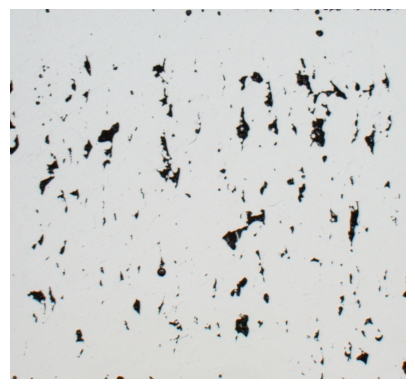

orginal image
img.shape (990, 1060, 3)


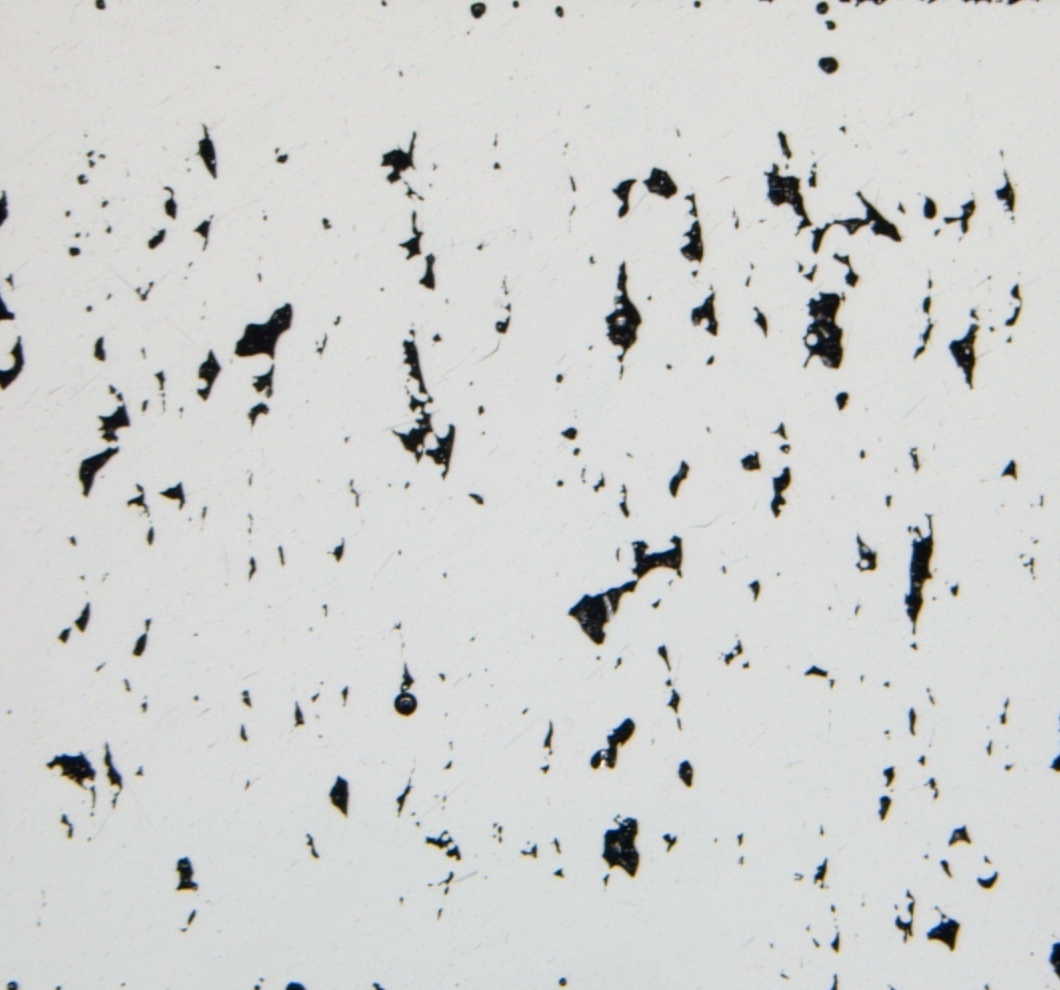

gray image
gray image.shape (990, 1060)


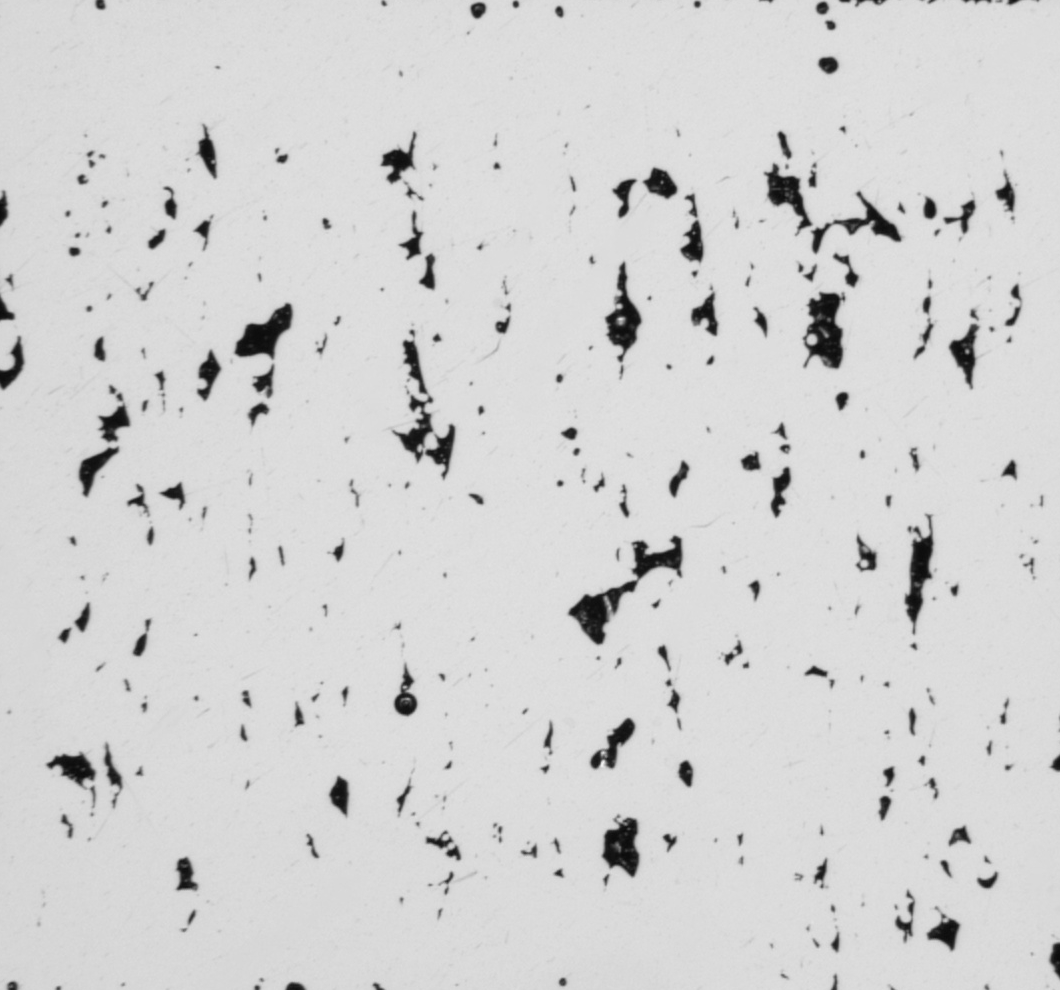

img converted to one column (1049400,)
input image (990, 1060)
gray image (1049400,)
train_img.shape (990, 1060)
train_df.shape (1049400, 10)
the binary image
binary shape (990, 1060)


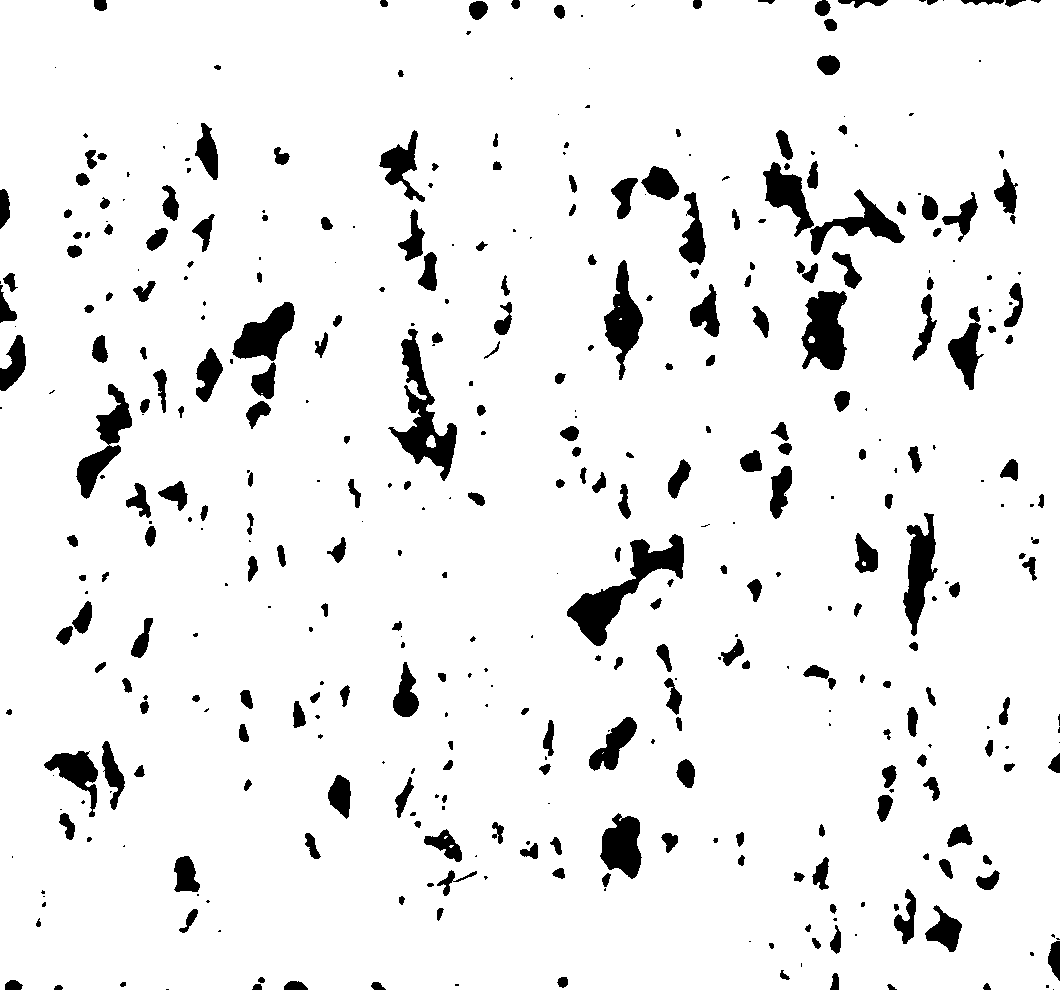

len main contours 411
cnt_area_list [1043541.5, 14.0, 13.0, 32.0, 108.0, 42.0, 66.5, 8.0, 20.0, 32.0, 4.0, 74.0, 15.0, 7.0, 8.5, 220.5, 41.5, 15.0, 39.0, 199.5, 72.5, 929.0, 38.5, 59.5, 25.0, 22.5, 12.0, 49.5, 4.0, 7.0, 16.5, 645.0, 8.5, 31.0, 15.0, 93.0, 90.0, 88.0, 305.0, 218.5, 113.0, 189.5, 369.5, 722.5, 4.0, 74.0, 65.5, 5.5, 40.0, 5.5, 195.5, 18.5, 27.5, 138.5, 27.0, 27.5, 229.5, 241.0, 100.5, 647.0, 5.0, 3.5, 403.5, 69.5, 152.0, 44.5, 1965.0, 273.5, 27.5, 4.0, 18.0, 4.0, 14.5, 324.5, 39.5, 17.5, 5.5, 20.0, 68.5, 226.0, 340.0, 727.5, 2.0, 2.0, 23.0, 254.5, 101.0, 93.0, 80.0, 8.0, 79.0, 422.0, 11.5, 97.5, 2.0, 1501.5, 13.5, 13.5, 45.0, 795.5, 114.5, 20.0, 22.5, 5.5, 60.5, 11.0, 156.0, 8.5, 285.5, 80.0, 1241.0, 0.0, 19.5, 17.5, 7.0, 35.5, 48.0, 15.5, 267.5, 11.0, 271.0, 101.0, 204.5, 52.5, 23.5, 81.0, 192.0, 114.5, 7.0, 153.0, 57.0, 18.5, 80.0, 7.0, 369.5, 113.0, 41.5, 18.5, 70.0, 16.0, 8.5, 258.5, 892.5, 79.0, 67.0, 12.5, 85.5, 34.5, 256.0, 70.0, 27.5, 316.0, 0.0, 28.0, 2.0, 8.5, 1

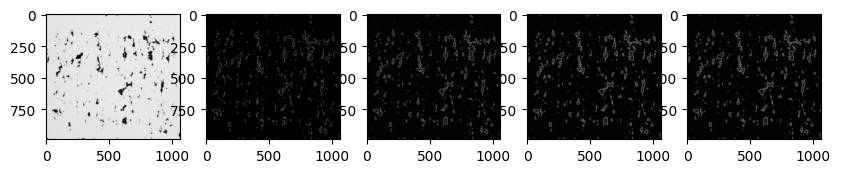

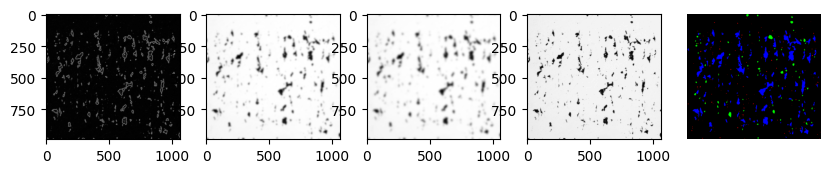

******* Add the labels variable then save the features and labels into csv file *******
labeled_img1 shape (1049400,)
annotation shape (990, 1060)
the unique labels [0 2 1 4]
the count of the unique labels 0    979461
4     58541
2      8621
1      2777
Name: Labels, dtype: int64
train_df.shape (1049400, 11)
train_df          Original Image  Canny Edge   Roberts     Sobel    Scharr   Prewitt  \
0                   213           0  0.002773  0.002192  0.002312  0.002067   
1                   214           0  0.006201  0.005717  0.005810  0.005622   
2                   215           0  0.002773  0.003100  0.002962  0.003333   
3                   215           0  0.006201  0.003100  0.002962  0.003333   
4                   215           0  0.007843  0.004902  0.005053  0.004713   
...                 ...         ...       ...       ...       ...       ...   
1049395             210           0  0.019608  0.034244  0.035744  0.032285   
1049396             215           0  0.000000  0.

In [5]:
## in case we have multi images for train:

# Directory containing the images
image_dir = "/content/train_images"
print('image_dir',image_dir)

# New directory for saving results
output_dir = "/content/labeled_train_result_images"
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

images_dataset = pd.DataFrame()

# Loop over the files in the directory
for image_file in os.listdir(image_dir):
  print('image_file',image_file)
  if image_file != '.ipynb_checkpoints':
    # Load the image
    img = cv2.imread(os.path.join(image_dir, image_file))

    input_image = img[:, 430:1490]  ## croped image used with only our data images   img.shape (1080, 1060, 3)
    input_image = input_image[45:1035,:]  ## croped image used with only our data images  img.shape (990, 1060, 3)

    # # Crop the image
    # x_start = 300
    # y_start = 0
    # width = 1300
    # height = 1080
    # input_image = img[y_start:y_start + height, x_start:x_start + width]

    plt.imshow(input_image)
    plt.axis('off')
    plt.show()

    train_img, train_df = extract_pixel_features(input_image)
    print('train_img.shape',train_img.shape)
    # print('train_img_org.shape',train_img_org.shape)
    print('train_df.shape',train_df.shape)

    #############################
    #Update dataframe for images to include details for each image in the loop
    #train_df = pd.DataFrame(train_df)

    train_output_labeled_image_path ='{}/labeled_train_image_{}'.format(output_dir,image_file)

    train_df_labeled = label_image(train_img, input_image, train_output_labeled_image_path,train_features_path, train_df)
    ##label_image(train_img, train_img_org, train_output_labeled_image_path,train_features_path, train_df)

    ############################
    # Concatenate the rows of df of the images
    images_dataset = pd.concat([images_dataset, train_df_labeled], axis=0)
    # Reset the index of the result DataFrame to have continuous integer indices
    images_dataset = images_dataset.reset_index(drop=True)
    print('train_df.shape',train_df.shape)
    print('train_df',train_df)

    print('images_dataset.shape',images_dataset.shape)
    print('images_dataset',images_dataset)
    ########################

y = images_dataset["Labels"].values
#Define the independent variables
X = images_dataset.drop(labels = ["Labels"], axis=1)
print('len x', len(X))


In [38]:
#############################################################################
# Handling Imbalanced data
###########################################
def balanced_classes(df):
  print('Technique of Up-sample minority class and Down-sample the majority class')
  print('using the same number of the pixels in Ellipse class==3 for all other classes')
  from sklearn.utils import resample
  print('Label counts of all the classes in the test image', df['Labels'].value_counts())
  count_all_classes = df['Labels'].value_counts()
  #ellipse_class_count = count_all_classes[3]
  #background_class_count = int((count_all_classes[0]) / 2)  # if i want  to match average class count of samples
  # count_df_LOF=df[df['Labels'] == 4].value_counts()


  #Separate majority and minority classes
  df_background = df.loc[df['Labels'].isin([0])]
  df_processed = df[df['Labels'] == 1]  # processed pore (red)
  df_Gas = df[df['Labels'] == 2] # Gas pore (green)
  #df_crack = df[df['Labels'] == 3] # crack pore (yellow)
  df_LOF = df[df['Labels'] == 4] # LOF pore (blue)

  # df_background_resampled = resample(df_background,
  #                                 replace=True,     # sample with replacement
  #                                 n_samples=60000,
  #                                 random_state=42) # reproducible results
  # df_processed_resampled = resample(df_processed,
  #                                 replace=True,
  #                                 n_samples=10000,
  #                                 random_state=42)
  df_Gas_resampled = resample(df_Gas,
                                  replace=True,
                                  n_samples=5000,
                                  random_state=42)
  # df_crack_resampled = resample(df_crack,
  #                                 replace=True,
  #                                 n_samples=60000,
  #                                 random_state=42)
  df_LOF_resampled = resample(df_LOF,
                                  replace=True,
                                  n_samples=60000,
                                  random_state=42)

  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_background, df_processed, df_Gas_resampled, df_LOF_resampled])
#  df_upsampled = pd.concat([df_background_resampled, df_processed_resampled, df_Gas_resampled, df_crack_resampled, df_keyhole_resampled, df_LOF_resampled, df_un_melted_resampled])
  print('The classes after up/down sampling:')
  print(df_upsampled['Labels'].value_counts())

  #Define the target
  Y_upsampled = df_upsampled["Labels"].values
  #Define the independent variables
  X_upsampled = df_upsampled.drop(labels = ["Labels"], axis=1)

  return X_upsampled, Y_upsampled

In [ ]:
# to train with the balanced classes

X, y = balanced_classes(train_df)

# import the classifiers

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils import class_weight

Trees_no=100

##https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# names = ["Nearest Neighbors", "Linear SVM","RBF SVM","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes", "QDA"]
# ##,"Gaussian Process"
# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     #GaussianProcessClassifier(1.0 * RBF(1.0),random_state = 42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=5, n_estimators=Trees_no, max_features=1, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]
## , random_state=42

# names = ["Linear_SVM","RBF_SVM","Decision_Tree","Random_Forest","Neural_Net","Naive_Bayes"]
# ##,"Gaussian Process"
# classifiers = [
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=10, n_estimators=Trees_no, max_features=5, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     GaussianNB(),
# ]


# # Calculate class weights automatically
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
# print('class_weights',class_weights)

names = ["Random Forest"]
# ##,"Gaussian Process"
# classifiers = [
#     RandomForestClassifier(max_depth=10, class_weight=dict(enumerate(class_weights)), n_estimators=Trees_no, max_features=5, random_state = 42)
# ]

# # with class weight balanced
classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=Trees_no, max_features=5, random_state = 42, class_weight='balanced')
]

# classifiers = [
#     RandomForestClassifier(max_depth=10, n_estimators=Trees_no, max_features=5, random_state = 42)
# ]

# Train model with all the image data

name: Random Forest
prediction_train results [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
X_train.shape (1049400, 10)
prediction_train.shape (1049400,)
type of prediction_train <class 'numpy.ndarray'>
Random Forest  CLF: Train time = H:M:S 0 : 3 : 12
Accuracy on training data =  98.476 %
precision on training data =  98.768 %
recall on training data =  98.476 %
f1 on training data =  98.593 %
auc  on training data =  99.615 %
Confusion Matrix [[975752    109    811   2789]
 [     0   2747     24      6]
 [     0    179   4938   350

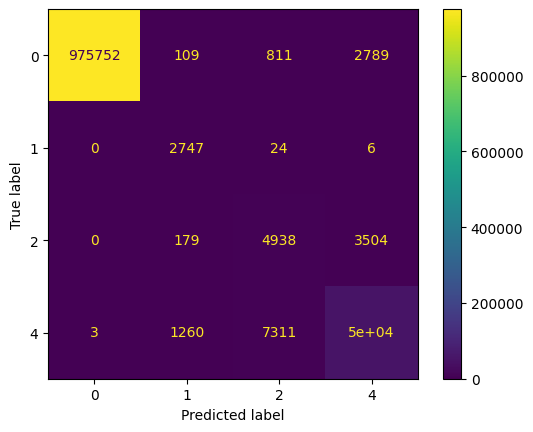

Label  0  accuracy =  0.996 %
Label  1  accuracy =  0.989 %
Label  2  accuracy =  0.573 %
Label  4  accuracy =  0.854 %
train_img.shape for segmented (990, 1060)
img_org.shape for predicted image (990, 1060, 3)
annotation_value 1
annotation_value 2
annotation_value 3
annotation_value 4
predicted_img shape (990, 1060, 3)


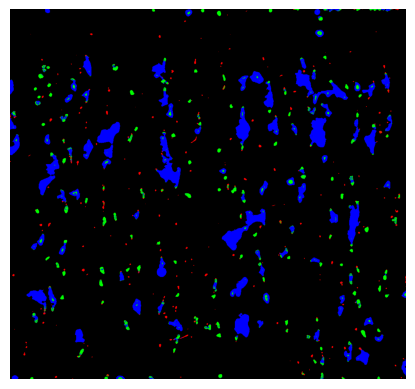

In [7]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix

start_train_time = time.time()
for name, model in zip(names, classifiers):
  print('name:', name)

  # Train the model on training data
  model.fit(X, y)

  train_time = time.time()-start_train_time
  local_train_time = time.localtime(train_time)

  # verify number of trees used. If not defined above.
  #print('Number of Trees used : ', model.n_estimators)

  #STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA AND CALCULATE THE ACCURACY SCORE
  #First test prediction on the training data itself. SHould be good.
  prediction_train = model.predict(X)
  print("prediction_train results", prediction_train[:250])
  print('X_train.shape',X.shape)
  print('prediction_train.shape',prediction_train.shape)
  ##print('train_img.shape',train_img.shape)
  print('type of prediction_train', type(prediction_train))

  #print(name, ' CLF: Feature extraction time = H:M:S', local_time_feature_rxtraction.tm_hour,':',local_time_feature_rxtraction.tm_min,':',local_time_feature_rxtraction.tm_sec)
  print(name, ' CLF: Train time = H:M:S', local_train_time.tm_hour,':',local_train_time.tm_min,':',local_train_time.tm_sec)

  #total_time = feat_ext_time+train_time
  #total_time = time.localtime(total_time)
  #print(name, ' CLF: Total time = H:M:S', total_time.tm_hour,':',total_time.tm_min,':',total_time.tm_sec)

  #prediction_prob_test = model.predict_proba(X_test)

  #Let us check the accuracy on test data
  from sklearn import metrics

  #First check the accuracy on training data. This will be higher than test data prediction accuracy. # accuracy: (tp + tn) / (p + n)
  train_acc = metrics.accuracy_score(y, prediction_train)*100
  print ("Accuracy on training data = ", round(train_acc,3), '%')
  #################
    ## precision tp / (tp + fp)
  precision = metrics.precision_score(y, prediction_train, average='weighted')*100
  print ("precision on training data = ", round(precision,3), '%')

    # recall: tp / (tp + fn)
  recall = metrics.recall_score(y, prediction_train, average='weighted')*100
  print ("recall on training data = ", round(recall,3), '%')

    ## f1: 2 tp / (2 tp + fp + fn)
  f1 = metrics.f1_score(y, prediction_train, average='weighted')*100
  print ("f1 on training data = ", round(f1,3), '%')

    ## ROC AUC
  y_score = model.predict_proba(X)
  auc  = metrics.roc_auc_score(y, y_score, multi_class='ovr', labels=model.classes_)*100
  print ("auc  on training data = ", round(auc ,3), '%')
  ####################

  #This part commented out for SVM testing. Uncomment for random forest.
  #One amazing feature of Random forest is that it provides us info on feature importances
  #Get numerical feature importances importances = list(model.feature_importances_)

  # feature_list = list(X.columns)
  # feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
  # print('The scors or important features',feature_imp)
  # feature_imp.to_csv("important_features.csv")
  #####################################
    #Confusion Matrix
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  from sklearn import metrics
  confusion_matrix = metrics.confusion_matrix(y, prediction_train)
  print('Confusion Matrix',confusion_matrix)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
  cm_display.plot()
  # New directory for saving results
  output_dir = "/content/predicted_images"
  os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist
  # plt.savefig('{}/confusion_matrix_train_image_{}.jpg'.format(output_dir,name), cm_display)
  plt.savefig('{}/confusion_matrix_train_image_{}.jpg'.format(output_dir, name))
  plt.show()

  #Print individual accuracy values for each class, based on the confusion matrix
  ind_class_acc = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
  for i in range(len(model.classes_)):
    print("Label ", model.classes_[i], " accuracy = ", round(ind_class_acc[i],3), '%')
  #####################
  import pickle
  #Save the trained model as pickle string to disk for future use
  CLF_res = "/content/CLF_res"
  os.makedirs(CLF_res, exist_ok=True)  # Create the output directory if it doesn't exist
  filename = "{}/{}_trained".format(CLF_res, name)
  pickle.dump(model, open(filename, 'wb'))

  print('train_img.shape for segmented',train_img.shape)
  print('img_org.shape for predicted image',input_image.shape)

  # # Color the pixels belonging to each contour
  colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255)}
  segmented = prediction_train.reshape((train_img.shape))

  predicted_img_train = np.zeros_like(input_image)

  for annotation_value, color in colors.items():
    print('annotation_value',annotation_value)
    pixels_of_certain_type = np.argwhere(segmented == annotation_value)
    #print('pixels_of_certain_type',pixels_of_certain_type)
    for x,y in pixels_of_certain_type:
      predicted_img_train[x, y] = np.array(color)

  plt.imshow(predicted_img_train)
  plt.axis('off')
  #cv2_imshow(predicted_img)
  print('predicted_img shape', predicted_img_train.shape)
  # saving results in predicted_images directory
  plt.imsave('{}/predicted_train_image_{}.jpg'.format(output_dir,name), predicted_img_train)


# **Predict using new images with the saved models**

In [14]:
# extract X from the new image
import os
from sklearn import metrics
models_path = "/content/CLF_res"

def predict_test_image(X_test_image, Y_test_image,models_path, image_file):
  for model in os.listdir(models_path):  #iterate through each file
    print('The CLF', model)
    #To test the model on future datasets
    # loaded_model = pickle.load(open(filename, 'rb'))
    if (models_path + '/' + model) != '/content/CLF_res/.ipynb_checkpoints':
      loaded_model = pickle.load(open(models_path + '/' + model, 'rb'))
      prediction_result = loaded_model.predict(X_test_image)

      print('Y_test_image',Y_test_image)
      print('prediction_result', prediction_result)

      acc = metrics.accuracy_score(Y_test_image, prediction_result)*100
      test_acc = round(acc,3)
      print ("Accuracy on full image data = ", round(acc,3), '%')

      #################
        ## precision tp / (tp + fp)
      precision = metrics.precision_score(Y_test_image, prediction_result, average='weighted')*100
      test_precision = round(precision,3)
      print ("precision on testing data = ", round(precision,3), '%')

        # recall: tp / (tp + fn)
      recall = metrics.recall_score(Y_test_image, prediction_result, average='weighted')*100
      test_recall = round(recall,3)
      print ("recall on testing data = ", round(recall,3), '%')

        ## f1: 2 tp / (2 tp + fp + fn)
      f1 = metrics.f1_score(Y_test_image, prediction_result, average='weighted')*100
      test_f1 = round(f1,3)
      print ("f1 on testing data = ", round(f1,3), '%')

        ## ROC AUC
      test_y_score = loaded_model.predict_proba(X_test_image)
      auc  = metrics.roc_auc_score(Y_test_image, test_y_score, multi_class='ovr', labels=loaded_model.classes_)*100
      test_auc = round(auc,3)
      print ("auc  on testing data = ", round(auc ,3), '%')
      ####################

      unique_values_pred, value_counts_pred = np.unique(prediction_result, return_counts=True)
      print('the unique predicted labels',  unique_values_pred)
      # Display the counts of each unique value
      for value, count in zip(unique_values_pred, value_counts_pred):
          print("unique predicted class:", value, "Count:", count)

      #Confusion Matrix
      from sklearn.metrics import confusion_matrix
      import matplotlib.pyplot as plt

      confusion_matrix = metrics.confusion_matrix(Y_test_image, prediction_result)
      print('Confusion Matrix',confusion_matrix)
      cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = loaded_model.classes_)
      cm_display.plot()
      plt.show()
      ######
      # New directory for saving results
      output_dir = "/content/predicted_images"
      os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist
      # plt.savefig('{}/confusion_matrix_train_image_{}.jpg'.format(output_dir,name), cm_display)
      plt.savefig('{}/confusion_matrix_test_image_{}_{}.jpg'.format(output_dir,image_file, name))
      plt.show()
      #######

      #Print individual accuracy values for each class, based on the confusion matrix
      ind_class_acc = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
      for i in range(len(loaded_model.classes_)):
        print("Label ", loaded_model.classes_[i], " accuracy = ", round(ind_class_acc[i],3), '%')

      #Right metric is ROC AUC
      #Starting version 0.23.1 you can report this for multilabel problems.
      #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
      from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

      # #For roc_auc_score in the multiclass case, these must be probability estimates which sum to 1.
      # prob_y_test = loaded_model.predict_proba(X_test_image)
      # print("ROC_AUC score for imbalanced data is:")
      # print(roc_auc_score(Y_test_image, prob_y_test, multi_class='ovr', labels=[0, 1, 2, 3]))

      print('img.shape for segmented',test_img.shape)
      print('test_img_org.shape for predicted image',test_input_image.shape)

      # # Color the pixels belonging to each contour
      colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255)}

      segmented = prediction_result.reshape((test_img.shape))

      predicted_img = np.zeros_like(test_input_image)

      for annotation_value, color in colors.items():
        print('annotation_value',annotation_value)
        pixels_of_certain_type = np.argwhere(segmented == annotation_value)
        #print('pixels_of_certain_type',pixels_of_certain_type)
        for x,y in pixels_of_certain_type:
          predicted_img[x, y] = np.array(color)

      plt.imshow(predicted_img)
      plt.axis('off')
      #cv2_imshow(predicted_img)
      print('predicted_img shape', predicted_img.shape)
      ##plt.imsave('/content/predicted_images/predicted_test_image_{}.jpg'.format(model), predicted_img)
      plt.imsave('{}/predicted_test_image_{}_{}.jpg'.format(output_dir,image_file,name), predicted_img)

      return test_acc, test_precision, test_f1, test_auc



image_dir /content/test_images
image_file 004.JPG
orginal image
img.shape (990, 1060, 3)


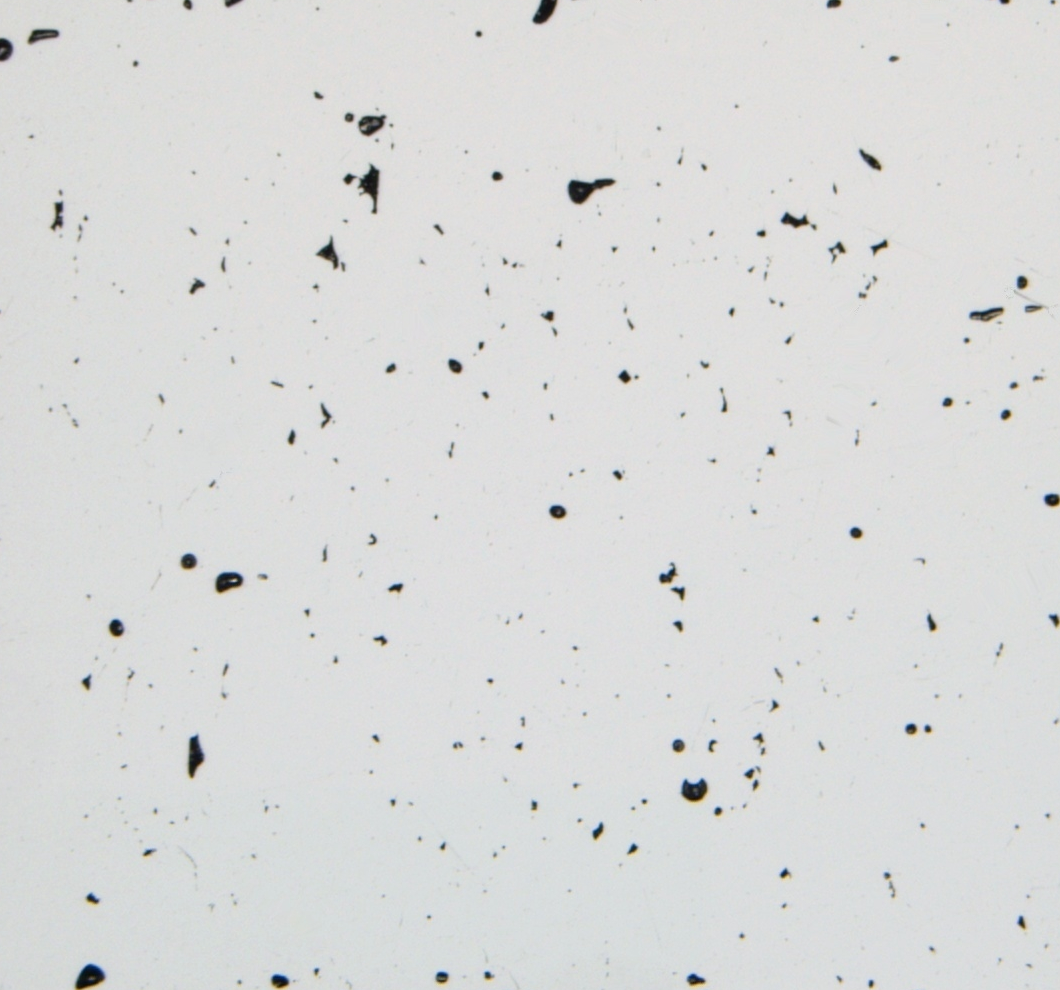

gray image
gray image.shape (990, 1060)


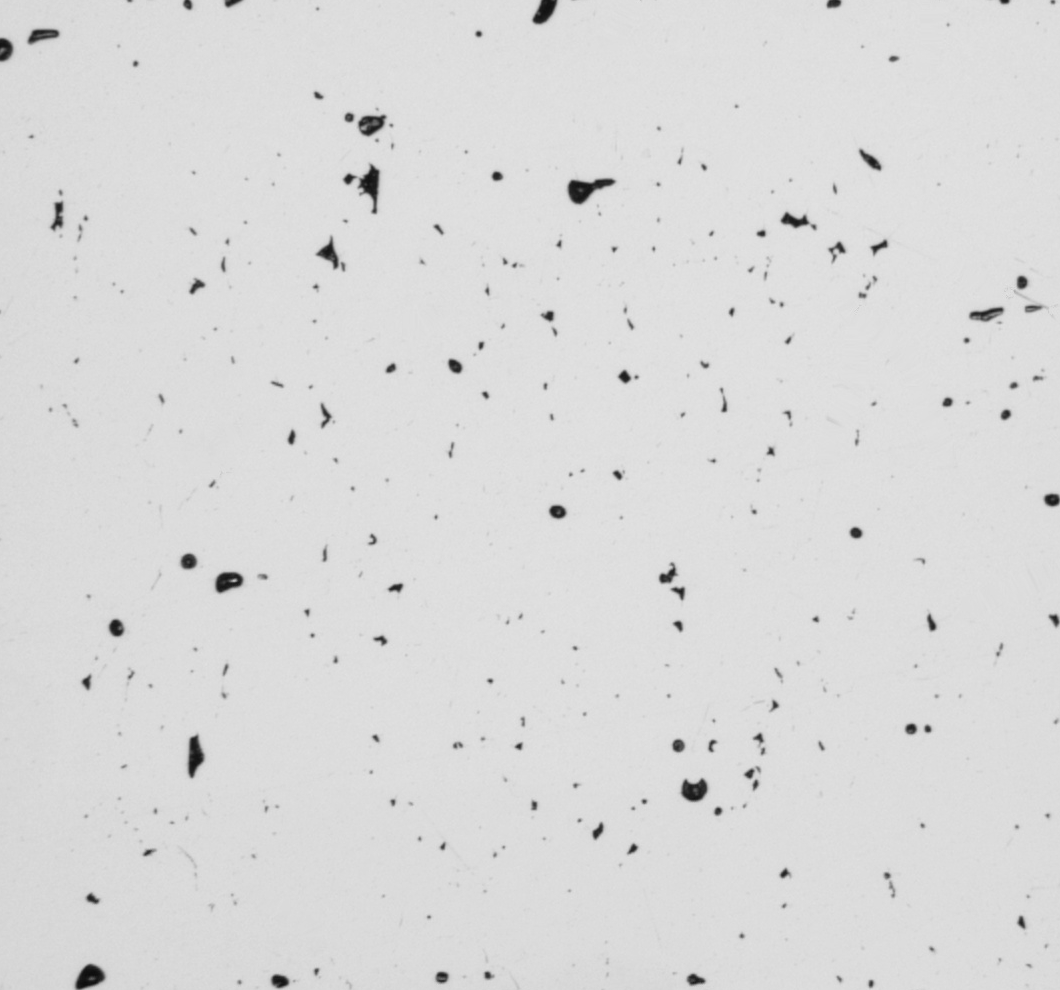

img converted to one column (1049400,)
input image (990, 1060)
gray image (1049400,)
the binary image
binary shape (990, 1060)


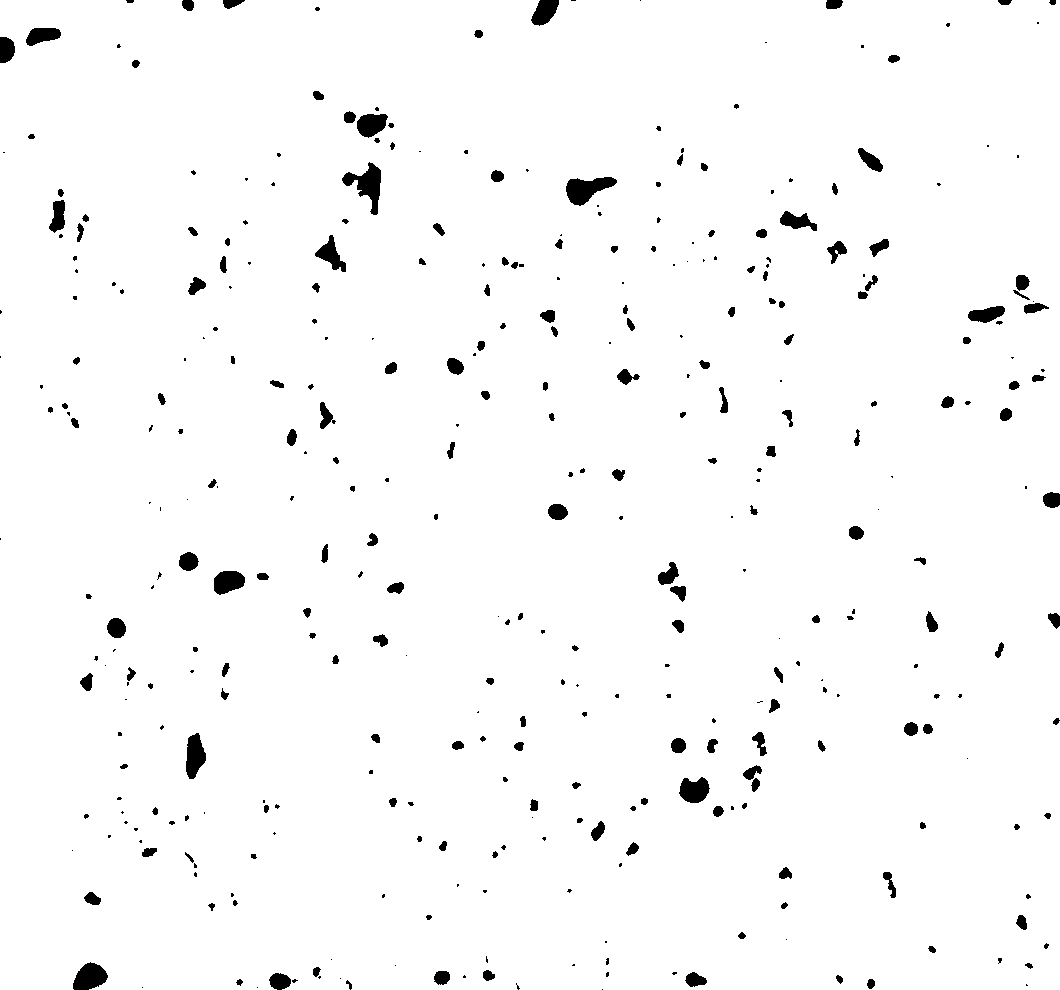

len main contours 359
cnt_area_list [1044501.0, 2.0, 2.0, 5.5, 4.0, 74.5, 20.5, 39.0, 2.0, 9.5, 51.0, 11.0, 244.5, 16.5, 19.0, 205.0, 112.5, 67.0, 2.0, 8.5, 38.5, 2.0, 2.0, 23.0, 26.0, 17.0, 49.0, 27.0, 7.0, 2.0, 47.0, 134.0, 30.5, 41.0, 40.5, 28.0, 24.5, 15.0, 15.0, 169.0, 15.0, 17.5, 8.5, 183.0, 17.5, 126.0, 15.0, 18.0, 32.5, 45.5, 36.5, 2.0, 121.5, 22.0, 119.5, 69.5, 11.0, 16.0, 32.0, 12.5, 8.0, 15.0, 34.0, 42.5, 188.0, 25.0, 12.0, 33.0, 2.0, 25.0, 24.5, 38.5, 4.0, 8.0, 42.0, 16.5, 105.0, 29.0, 42.5, 21.0, 30.5, 25.0, 10.0, 94.0, 50.5, 66.5, 17.5, 51.5, 97.0, 630.0, 27.0, 21.5, 180.5, 38.0, 2.0, 81.5, 98.0, 68.0, 123.5, 203.5, 30.0, 74.0, 685.5, 209.0, 21.5, 17.0, 93.5, 172.0, 19.5, 66.5, 26.0, 5.5, 6.0, 6.0, 111.0, 4.0, 17.5, 28.5, 11.0, 24.0, 20.0, 64.0, 25.0, 8.0, 29.5, 11.5, 5.5, 24.5, 53.5, 172.0, 13.5, 92.0, 83.5, 2.0, 20.0, 19.0, 83.0, 21.0, 20.5, 2.0, 56.5, 8.5, 29.5, 35.0, 93.0, 2.0, 140.5, 38.0, 19.0, 126.0, 27.0, 324.5, 30.0, 2.0, 60.0, 37.0, 184.0, 19.5, 66.0, 32.0, 179.

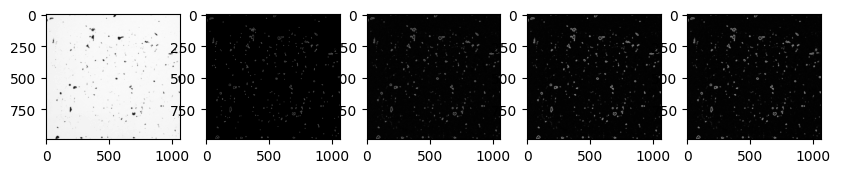

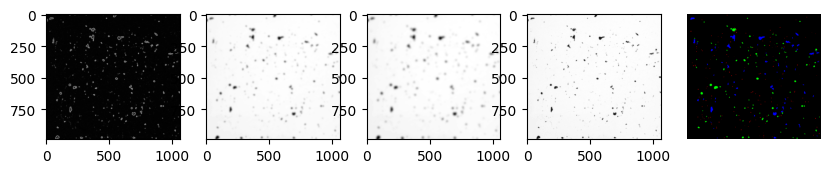

******* Add the labels variable then save the features and labels into csv file *******
labeled_img1 shape (1049400,)
annotation shape (990, 1060)
the unique labels [0 1 4 2]
the count of the unique labels 0    1028395
4      10666
2       7954
1       2385
Name: Labels, dtype: int64
The CLF Random Forest_trained
Y_test_image [0 0 0 ... 0 0 0]
prediction_result [0 0 0 ... 0 0 0]
Accuracy on full image data =  98.906 %
precision on testing data =  99.031 %
recall on testing data =  98.906 %
f1 on testing data =  98.951 %
auc  on testing data =  99.715 %
the unique predicted labels [0 1 2 4]
unique predicted class: 0 Count: 1025659
unique predicted class: 1 Count: 4582
unique predicted class: 2 Count: 7672
unique predicted class: 4 Count: 11487
Confusion Matrix [[1025659     108     231    2397]
 [      0    2353       5      27]
 [      0    1217    3793    2944]
 [      0     904    3643    6119]]


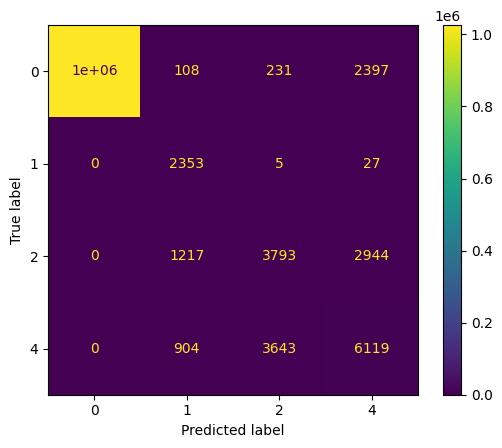

<Figure size 640x480 with 0 Axes>

Label  0  accuracy =  0.997 %
Label  1  accuracy =  0.987 %
Label  2  accuracy =  0.477 %
Label  4  accuracy =  0.574 %
img.shape for segmented (990, 1060)
test_img_org.shape for predicted image (990, 1060, 3)
annotation_value 1
annotation_value 2
annotation_value 3
annotation_value 4
predicted_img shape (990, 1060, 3)
image_file 003.JPG
orginal image
img.shape (990, 1060, 3)


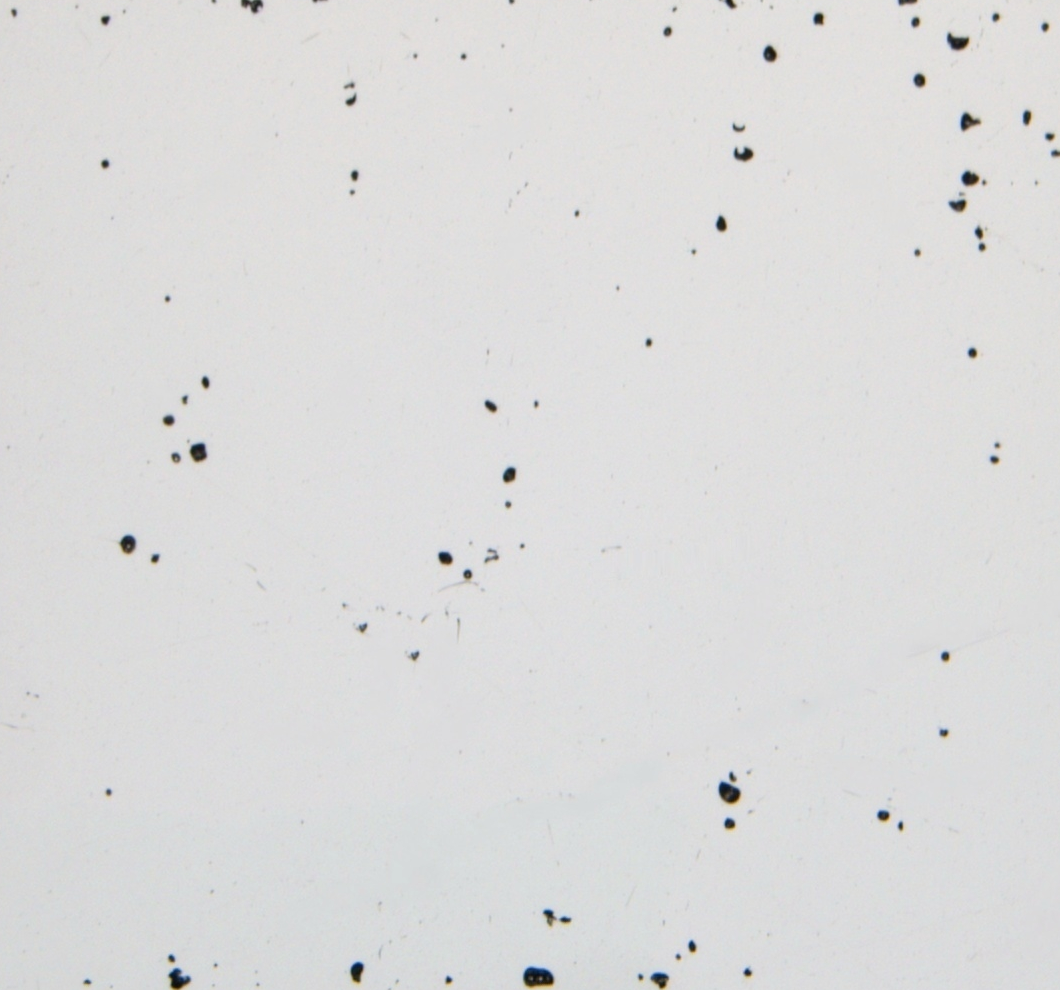

gray image
gray image.shape (990, 1060)


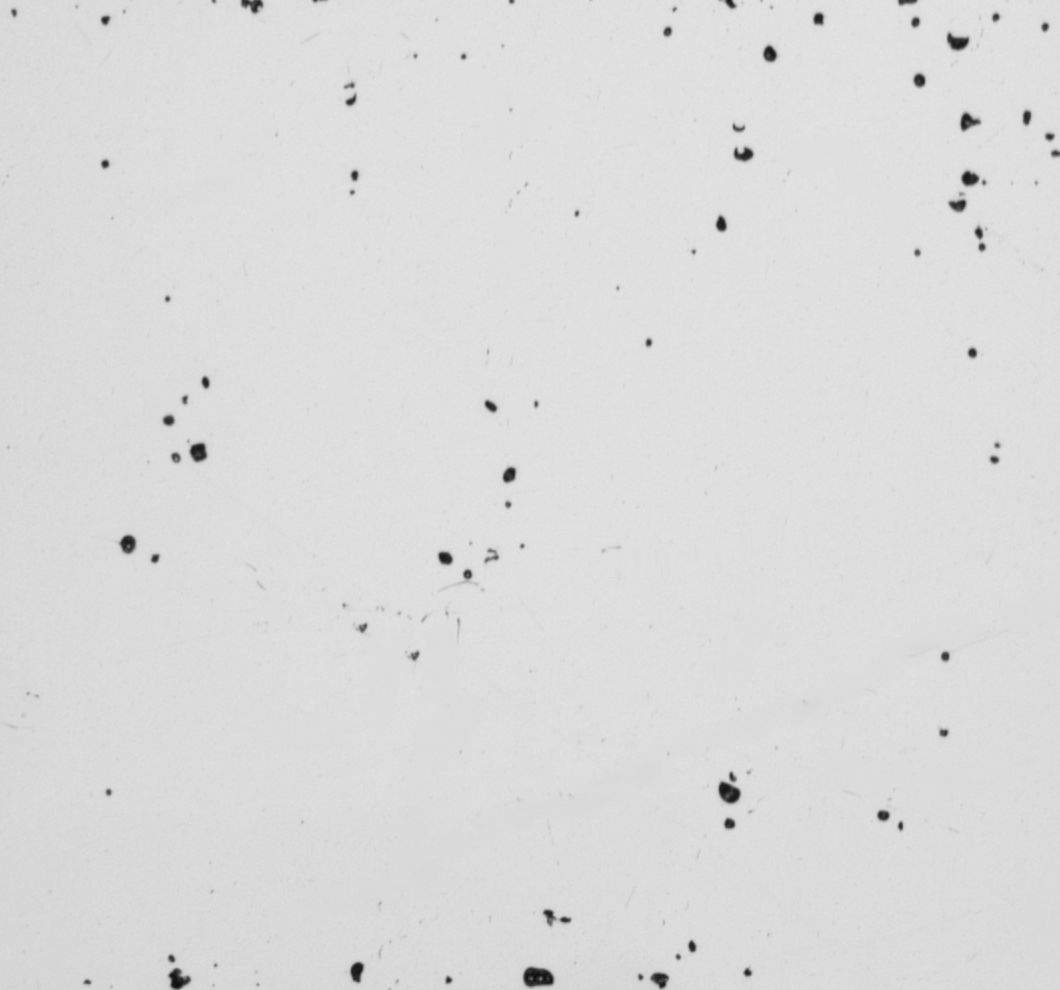

img converted to one column (1049400,)
input image (990, 1060)
gray image (1049400,)
the binary image
binary shape (990, 1060)


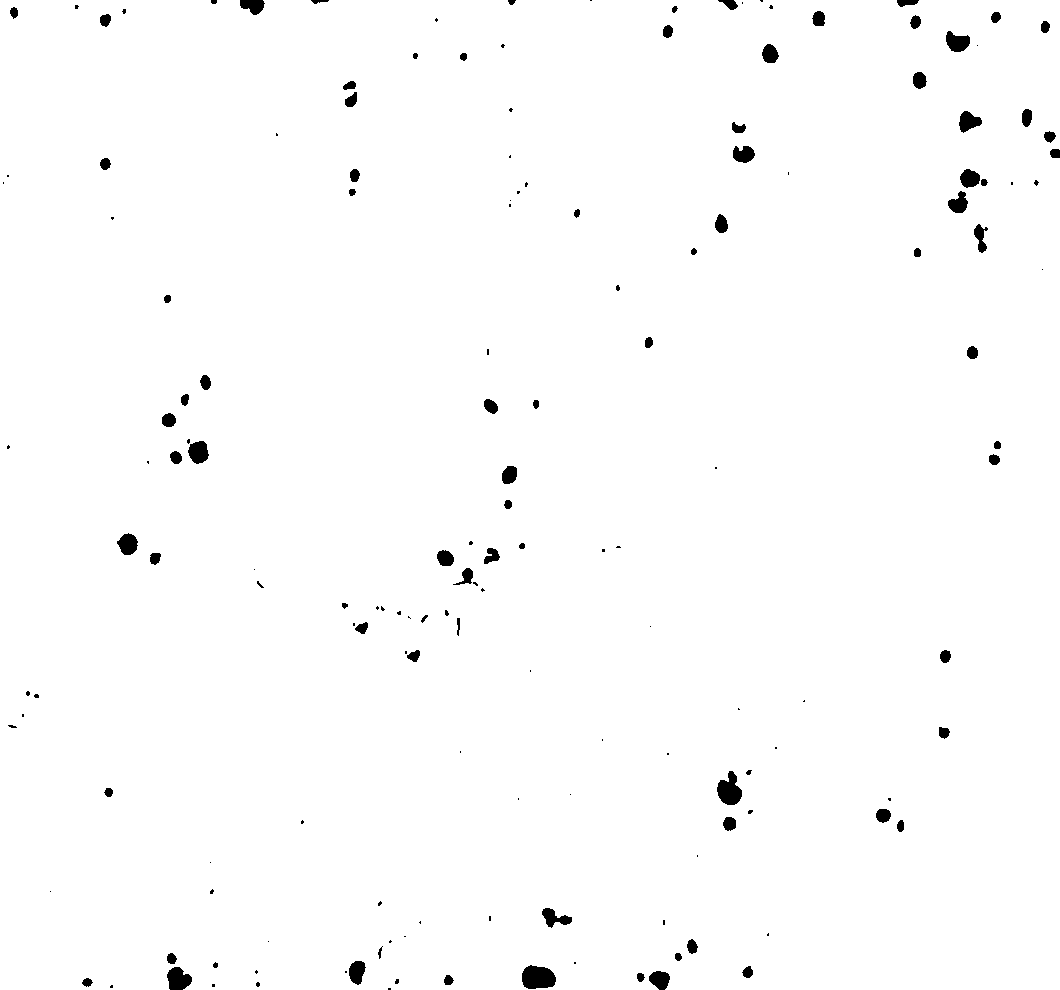

len main contours 156
cnt_area_list [1045891.0, 12.5, 14.0, 22.0, 24.0, 79.0, 88.0, 66.0, 7.0, 12.0, 108.5, 694.5, 7.0, 30.5, 325.0, 55.5, 98.0, 39.0, 2.0, 2.0, 9.5, 134.0, 4.0, 8.5, 7.0, 16.0, 16.0, 341.5, 18.5, 2.0, 20.0, 2.0, 4.0, 82.0, 13.5, 166.0, 22.5, 186.0, 12.5, 4.0, 2.0, 73.5, 598.0, 28.5, 7.0, 4.0, 7.0, 4.0, 116.0, 27.0, 10.0, 5.5, 5.5, 23.5, 22.0, 4.0, 10.0, 128.5, 119.5, 2.0, 10.0, 117.0, 61.0, 2.0, 5.5, 35.0, 19.0, 25.0, 17.5, 12.0, 34.5, 13.5, 18.0, 27.5, 2.0, 184.0, 121.5, 238.0, 14.0, 187.0, 13.0, 38.5, 18.5, 354.0, 69.0, 7.0, 247.0, 8.5, 108.5, 136.0, 13.5, 59.0, 388.5, 17.5, 176.0, 55.0, 170.5, 88.5, 141.0, 19.0, 132.5, 86.0, 58.0, 26.0, 2.0, 67.0, 40.5, 251.5, 11.0, 205.5, 50.5, 10.0, 2.0, 311.5, 12.5, 49.5, 10.0, 16.5, 4.0, 24.5, 49.0, 7.0, 6.0, 307.5, 118.5, 115.0, 8.5, 313.5, 8.5, 114.0, 124.5, 346.5, 169.0, 16.0, 143.0, 99.0, 205.0, 55.5, 33.0, 2.0, 264.0, 16.0, 383.0, 119.5, 101.0, 12.0, 127.0, 126.0, 99.5, 179.5, 21.5, 83.0, 37.5, 17.5, 19.0, 4.0]
area after t

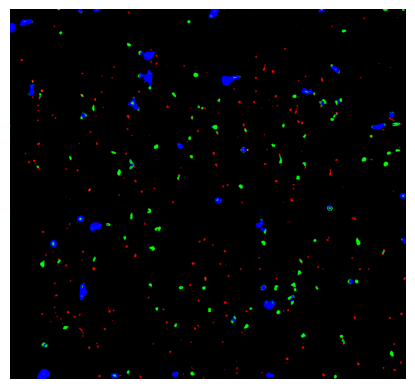

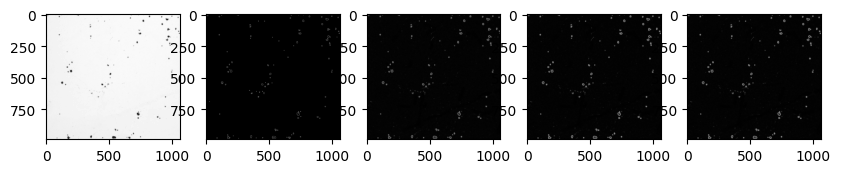

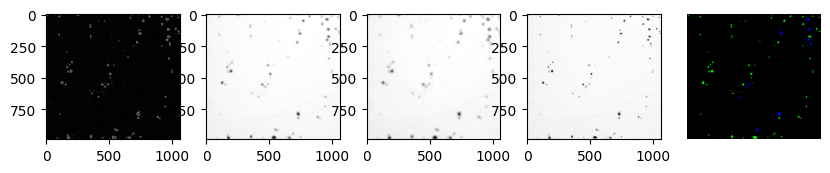

******* Add the labels variable then save the features and labels into csv file *******
labeled_img1 shape (1049400,)
annotation shape (990, 1060)
the unique labels [0 1 2 4]
the count of the unique labels 0    1038693
2       7125
4       2950
1        632
Name: Labels, dtype: int64
The CLF Random Forest_trained
Y_test_image [0 0 0 ... 0 0 0]
prediction_result [0 0 0 ... 0 0 0]
Accuracy on full image data =  99.447 %
precision on testing data =  99.63 %
recall on testing data =  99.447 %
f1 on testing data =  99.5 %
auc  on testing data =  99.854 %
the unique predicted labels [0 1 2 4]
unique predicted class: 0 Count: 1037265
unique predicted class: 1 Count: 1178
unique predicted class: 2 Count: 4815
unique predicted class: 4 Count: 6142
Confusion Matrix [[1037265      50     209    1169]
 [      0     629       0       3]
 [      0     363    3746    3016]
 [      0     136     860    1954]]


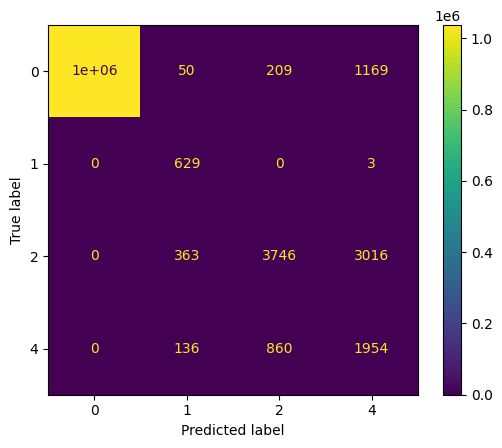

<Figure size 640x480 with 0 Axes>

Label  0  accuracy =  0.999 %
Label  1  accuracy =  0.995 %
Label  2  accuracy =  0.526 %
Label  4  accuracy =  0.662 %
img.shape for segmented (990, 1060)
test_img_org.shape for predicted image (990, 1060, 3)
annotation_value 1
annotation_value 2
annotation_value 3
annotation_value 4
predicted_img shape (990, 1060, 3)
[98.906, 99.447] [99.031, 99.63] [98.951, 99.5] [99.715, 99.854]
average accuracy over 2 images 99.1765
average precision over 2 images 99.3305
average f1 over 2 images 99.2255
average AUC over 2 images 99.78450000000001


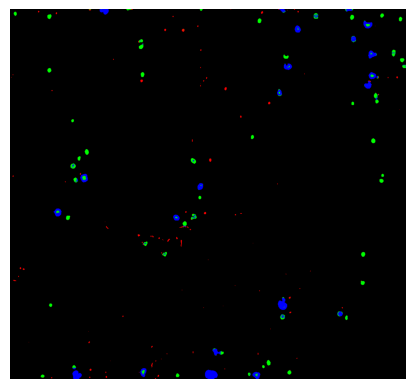

In [19]:
## in case we have multi images for test:

# Directory containing the images
image_dir = "/content/test_images"
print('image_dir',image_dir)

# New directory for saving results
output_dir = "/content/labeled_test_result_images"
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

test_acc, test_precision, test_f1, test_auc=[],[],[],[]
# Loop over the files in the directory
for image_file in os.listdir(image_dir):
  print('image_file',image_file)
  if image_file != '.ipynb_checkpoints':
    # Load the image
    test_input_image = cv2.imread(os.path.join(image_dir, image_file))

    test_input_image = test_input_image[:, 430:1490]  ## croped image used with only our data images   img.shape (1080, 1060, 3)
    test_input_image = test_input_image[45:1035,:]  ## croped image used with only our data images  img.shape (990, 1060, 3)

    # extract the features out of the test image:
    test_img, test_df = extract_pixel_features(test_input_image)

    test_output_labeled_image_path ='{}/labeled_test_image_{}'.format(output_dir,image_file)  ### nnnewwwwww
    label_image(test_img, test_input_image, test_output_labeled_image_path, test_features_path, test_df)

    ##
    Y_test_image = test_df["Labels"].values
    # Define the independent variables
    X_test_image = test_df.drop(labels = ["Labels"], axis=1)

    #predict_test_image(X_test_image, Y_test_image,models_path, image_file)
    test_acc_v, test_precision_v, test_f1_v, test_auc_v = predict_test_image(X_test_image, Y_test_image,models_path, image_file)
    test_acc.append(test_acc_v)
    test_precision.append(test_precision_v)
    test_f1.append(test_f1_v)
    test_auc.append(test_auc_v)


print(test_acc, test_precision, test_f1, test_auc)
print('average accuracy over',len(test_acc), 'images', sum(test_acc) / len(test_acc))
print('average precision over',len(test_precision), 'images', sum(test_precision) / len(test_precision))
print('average f1 over',len(test_f1), 'images', sum(test_f1) / len(test_f1))
print('average AUC over',len(test_auc), 'images', sum(test_auc) / len(test_auc))


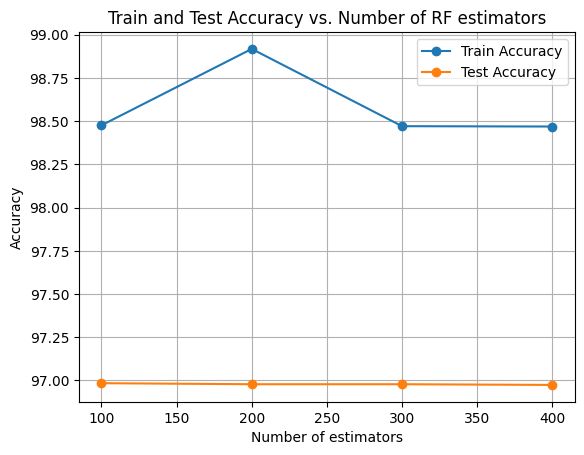

In [34]:
import matplotlib.pyplot as plt

n_estimators_list = [100, 200, 300, 400]
train_accuracy_list = [98.476  , 98.918 ,98.471  , 98.469 ]
test_accuracy_list = [96.984  , 96.978 , 96.978 ,96.974 ]

plt.plot(n_estimators_list, train_accuracy_list, label='Train Accuracy', marker='o')
plt.plot(n_estimators_list, test_accuracy_list, label='Test Accuracy', marker='o')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of RF estimators')
plt.legend()
plt.grid(True)
plt.show()